In [1]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets
#%matplotlib notebook
%matplotlib ipympl

plt.rcParams.update({'font.size': 10})

# Single pulse graph

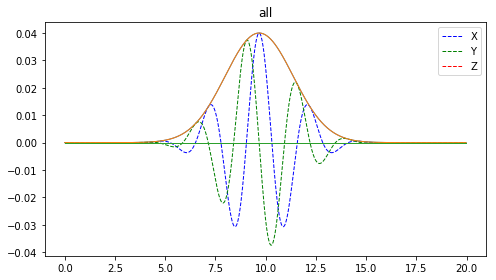

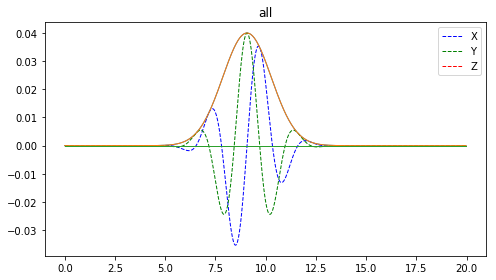

In [2]:
def graph_single(pulseX,pulseY,pulseZ, fs, reso):
    pulses = [pulseX,pulseY,pulseZ]

    # actual plotting array
    fsarray = (np.arange(fs*reso))/reso
    a = qp.fromFsToAu(fsarray)
    bx, by, bz = [ qp.pulZe(a,this_pulse) for this_pulse in pulses ] 
    cx, cy, cz = [ qp.envel(a,this_pulse[0],this_pulse[2],this_pulse[4]) for this_pulse in pulses ]

    #fig, [[ax0, ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(14,8),sharey=True,sharex=True)
    fig, ax0 = plt.subplots(1,1,figsize=(7,4))

    ax0.plot(fsarray,bx,ls='--', lw=1, label='X', color='b')
    ax0.plot(fsarray,cx, lw=1)
    ax0.plot(fsarray,by,ls='--', lw=1, label='Y', color='g')
    ax0.plot(fsarray,cy, lw=1)
    ax0.plot(fsarray,bz,ls='--', lw=1, label='Z', color='r')
    ax0.plot(fsarray,cz, lw=1)
    ax0.set_title('all')
    ax0.legend()

#     ax1.plot(fsarray,bx, color='b')
#     ax1.plot(fsarray,cx)
#     ax1.set_title('X')
    
#     ax2.plot(fsarray,by, color='g')
#     ax2.plot(fsarray,cy)
#     ax2.set_title('Y')

#     ax3.plot(fsarray,bz, color='r')
#     ax3.plot(fsarray,cz)
#     ax3.set_title('Z')


    fig.tight_layout();
    
pulseX = [0.04,0.06,70,0,400]
pulseY = [0.04,0.06,70,1.570796,400] 
pulseZ = [0,0,0,0,0]

# good one

pulseX2 = [0.04,0.06,50,-1.570796,375]
pulseY2 = [0.04,0.06,50,0,375]
pulseZ2 = [0,0,0,0,0]

# graph length in fs
fs = 20
# graph resolution
reso = 40

graph_single(pulseX,pulseY,pulseZ,fs,reso)
graph_single(pulseX2,pulseY2,pulseZ2,fs,reso)

(800,)


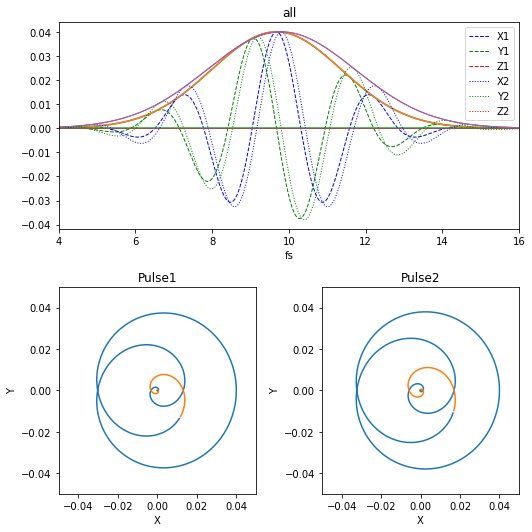

In [3]:
def graph_double(pulseX1,pulseY1,pulseZ1,pulseX2,pulseY2,pulseZ2, fs, reso):
    pulses1 = [pulseX1,pulseY1,pulseZ1]
    pulses2 = [pulseX2,pulseY2,pulseZ2]

    # actual plotting array
    fsarray = (np.arange(fs*reso))/reso
    
    a = qp.fromFsToAu(fsarray)
    bx1, by1, bz1 = [ qp.pulZe(a,this_pulse) for this_pulse in pulses1 ] 
    cx1, cy1, cz1 = [ qp.envel(a,this_pulse[0],this_pulse[2],this_pulse[4]) for this_pulse in pulses1 ]
    bx2, by2, bz2 = [ qp.pulZe(a,this_pulse) for this_pulse in pulses2 ] 
    cx2, cy2, cz2 = [ qp.envel(a,this_pulse[0],this_pulse[2],this_pulse[4]) for this_pulse in pulses2 ]
    print(bx1.shape)
    #fig, [[ax0, ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(14,8),sharey=True,sharex=True)
    fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(7.5,7.5))
    
    ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    
    ax0.plot(fsarray,bx1,ls='--', lw=1, label='X1', color='b')
    ax0.plot(fsarray,cx1, lw=1.5)
    ax0.plot(fsarray,by1,ls='--', lw=1, label='Y1', color='g')
    ax0.plot(fsarray,cy1, lw=1.5)
    ax0.plot(fsarray,bz1,ls='--', lw=1, label='Z1', color='r')
    ax0.plot(fsarray,cz1, lw=1.5)
    ax0.plot(fsarray,bx2,ls=':', lw=1, label='X2', color='b')
    ax0.plot(fsarray,cx2, lw=1)
    ax0.plot(fsarray,by2,ls=':', lw=1, label='Y2', color='g')
    ax0.plot(fsarray,cy2, lw=1)
    ax0.plot(fsarray,bz2,ls=':', lw=1, label='Z2', color='r')
    ax0.plot(fsarray,cz2, lw=1)
    ax0.set_title('all')
    ax0.set_xlabel('fs')
    ax0.set_xlim(4,16)
    ax0.legend()
    
    ax2.set_xlim(-0.05,0.05)
    ax2.set_ylim(-0.05,0.05)

    bond1 = 100
    bond2 = 300
    
    ax2.plot(bx1[bond2:],      by1[bond2:])
    ax2.plot(bx1[bond1:bond2], by1[bond1:bond2])
    ax2.plot(bx1[:bond1],      by1[:bond1])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Pulse1')
    
    ax3.set_xlim(-0.05,0.05)
    ax3.set_ylim(-0.05,0.05)
    
    ax3.plot(bx2[bond2:],      by2[bond2:])
    ax3.plot(bx2[bond1:bond2], by2[bond1:bond2])
    ax3.plot(bx2[:bond1],      by2[:bond1])
    ax3.set_title('Pulse2')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    
    fig.tight_layout();
    
pulseX1 = [0.04,0.06,70.11,0,400]
pulseY1 = [0.04,0.06,70.11,1.570796,400] 
pulseZ1 = [0,0,0,0,0]

# good one
pulseX2 = [0.04,0.06,80,0,405]
pulseY2 = [0.04,0.06,80,1.570796,405]
pulseZ2 = [0,0,0,0,0]

# graph length in fs
fs = 20
# graph resolution
reso = 40

graph_double(pulseX1,pulseY1,pulseZ1,pulseX2,pulseY2,pulseZ2, fs, reso)

In [4]:
# Altri pulses che ho lanciato

# pulseX2 = [0.04,0.06,140,0,600]
# pulseY2 = [0.04,0.06,140,1.570796,600]
# pulseZ2 = [0,0,0,0,0]


# pulseX2 = [0.04,0.06,90,1.570796,425]
# pulseY2 = [0.04,0.06,90,1.570796*2,425]
# pulseZ2 = [0,0,0,0,0]


In [5]:
dataDict = np.load('/home/alessio/n-Propagation/datanewoneWithNACnow.npy')[()]

In [6]:
def expARR(array,howmany,direction=None):
    direction = direction or 'both'
    dx = array[1]-array[0]
    after = (array[-1] + (dx * np.arange(howmany+1)))[1:]
    before = np.flip((array[0] - (dx * np.arange(howmany+1)))[1:],0)
    if direction == 'both':
        return np.concatenate((before,array,after))
    elif direction == 'dx':
        return np.concatenate((array,after))
    elif direction == 'sx':
        return np.concatenate((before,array))
    
phiV, gamV, theV = qp.fromLabelsToFloats(dataDict)

phis = qp.labTranformA(dataDict['phis'])
gams = qp.labTranformA(dataDict['gams'])
thes = qp.labTranformA(dataDict['thes'])

phiL = len(phis)
gamL = len(gams)
theL = len(thes)

In [7]:
# This part creates the potentials

import scipy.io as sio

# saveNew_matlab_Vector = False
# #phi_L, gam_L, the_L, nstates =  potential.shape

nstates = 8

# if saveNew_matlab_Vector:
#     allstates = {}

#     for s in range(nstates):
#         ground = potential[:,:,:,s]
#         tupl = ground.shape
#         ground.shape,phiV.shape,gamV.shape,theV.shape

#         phi_mesh, gam_mesh, the_mesh =  np.meshgrid(phiV,gamV,theV, indexing='ij')

#         phi_prime = phi_mesh.reshape(-1,1)
#         gam_prime = gam_mesh.reshape(-1,1)
#         the_prime = the_mesh.reshape(-1,1)

#         X = np.concatenate((phi_prime,gam_prime,the_prime), axis=1)

#         y = ground.reshape(-1,1)

#         poly = PolynomialFeatures(degree=10)

#         X_ = poly.fit_transform(X)

#         clf = LinearRegression()
#         clf.fit(X_, y)

#         prediction = clf.predict(X_)
#         prediction_reshaped = prediction.reshape(tupl)
#         stringName = 'TDM{}'.format(s)
#         allstates[stringName] = prediction_reshaped

#     sio.savemat('np_vector.mat', allstates)

aaa = sio.loadmat('/home/alessio/n-Propagation/tdm.mat')
new = aaa['v0']
new_phi_L, new_gam_L, new_the_L = new.shape
ext_potential = np.empty((new_phi_L, new_gam_L, new_the_L, nstates))

phi_cayo = expARR(phiV,15,'both')
gam_cayo = expARR(gamV,15,'both')
the_cayo = expARR(theV,30,'both')

phi_mesh_cayo, gam_mesh_cayo, the_mesh_cayo =  np.meshgrid(phi_cayo,gam_cayo,the_cayo, indexing='ij')

for s in range(nstates):
    label = 'v{}'.format(s)
    ext_potential[:,:,:,s] = aaa[label]
    
zero = np.amin(ext_potential)
ext_potential = ext_potential - zero

In [8]:
# minimum index
ij_min = np.unravel_index(ext_potential.argmin(), ext_potential.shape)
phi_min,gam_min,the_min,ground_min = ij_min
ij_min

(29, 28, 55, 0)

In [9]:
def graphichetto(pulseXX, label, phi_slice, gam_slice, save=None, internal_coord=None):
    save = save or False
    internal_coord = internal_coord or False
    sigma = pulseXX[2]
    omega = pulseXX[1]

    # I will cut the cube at phi_min and gamma_min
    potAU = ext_potential[phi_slice,gam_slice]
    
    # change dimensions
    pot = qp.fromHartoEv(potAU)
    
    # create labels
    thes = qp.labTranformA(dataDict['thes'])

    # create the 4 panels
    fig, ([ax, ax0], [ax1, ax2]) = plt.subplots(2,2, gridspec_kw = {'height_ratios':[3, 1], 'width_ratios':[3, 1]},figsize=(15,10))
    ax2.axis('off')
    
    xmin = the_cayo[the_min]
    puntoMin = [the_min,0]


    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    for iii in range(nstates):
        if internal_coord:
            ax.plot(the_cayo, potAU[:,iii], ls='-', lw=1.5, color=colors[iii]);
            ax.set_ylabel('Potential Energy (Hartree)')
        else:
            ax.plot(the_cayo, pot[:,iii], ls='-', lw=1.5, color=colors[iii]);
            ax.set_ylabel('Potential Energy (eV)')

    #ax.set_xlabel('q')
    #ax.set_ylabel('Potential Energy')

    # fs extent of GRAPH
    fs = 100
    # resolution of graph
    reso = 20
    
    # actaual values for the pulse
    fsarray = (np.arange(fs*reso))/reso
    
    # I need the fsarray in AU to call the internal functions pulZe and envel
    a = qp.fromFsToAu(fsarray)
    

    f = qp.pulZe(a,pulseXX)

    title_thing = r'AU -> $E$={:5.2f}  $\omega$={:6.3f}  $\sigma$={:6.3f}  $\phi$={:6.3f}  $t_0$={:5.2f}'.format(pulseXX[0],pulseXX[1],pulseXX[2],pulseXX[3],pulseXX[4])
    ax.set_title(title_thing)
    
    c = qp.envel(a,pulseXX[0],pulseXX[2],pulseXX[4])


    # but then I plot on femtoseconds
    if internal_coord:
        ax1.plot(a,f)
        ax1.plot(a,c)
        ax1.set_xlabel('Time (AU)')        
    else:
        ax1.plot(fsarray,f)
        ax1.plot(fsarray,c)
        ax1.set_xlabel('Time (fs)')
    
    #labels

    ax.set_xlabel(r'$\theta$ (rad)')

    # sigma in energy space
  
    e = 1/(sigma)
    #e = 2*np.pi/(sigma)
    #e = (np.pi**2)*sigma**2
    #e = 1/(2 * np.pi*(sigma))
    print('e = {}'.format(e))
    
    # the 67% is sigma
    # the 95% interval is 2 sigma. This is why e*2
    # first and second are still in hartree.
    
    first_half = pulseXX[1] - (e *np.sqrt(2*(np.log(2))))
    second_half = pulseXX[1] + (e *np.sqrt(2*(np.log(2))))

    first = pulseXX[1] - (e)
    second = pulseXX[1] + (e)
    first2 = pulseXX[1] - (2*e)
    second2 = pulseXX[1] + (2*e)

    # grey band
    if internal_coord:
        #ax.fill_between(the_cayo, first2, second2, color='whitesmoke')
        ax.fill_between(the_cayo, first_half, second_half, color='gainsboro') # grey bar
        ax.plot([xmin, xmin], [first_half, second_half], 'k-', lw=2) # black line
    else:
        #ax.fill_between(the_cayo, qp.fromHartoEv(first2), qp.fromHartoEv(second2), color='whitesmoke')
        ax.fill_between(the_cayo, qp.fromHartoEv(first_half), qp.fromHartoEv(second_half), color='gainsboro')
        ax.plot([xmin, xmin], [qp.fromHartoEv(first_half),qp.fromHartoEv(second_half)], 'k-', lw=2)
    
    ax.set_ylim(0,10)
    maxValue_in_ev = qp.fromEvtoHart(np.amax(pot))
    w = np.linspace(0,maxValue_in_ev,800)

    # This is the other gaussian in reciprocal space.
    e = 1/(sigma)
    other = np.exp(-(w-omega)**2 / (2 * e**2))
    
    #    other = np.exp(-(w-omega)**2 * e)
    
    if internal_coord:
        ax0.plot(other,w)
    else:
        ax0.plot(qp.fromHartoEv(other),qp.fromHartoEv(w))
    
    
    ax0.set_xticks([])
    
    fig.tight_layout()
    
    if save:
        name_fig = 'pulse{:04d}.png'.format(label)
        fig.savefig(name_fig, dpi=300)


    

In [10]:
omega = 1.54980/27.211
sigma = 100
qp.pulse(800,0.024,omega,sigma,0,800)
number = 2*np.sqrt(2*(np.log(2)))

In [11]:
def graphichetto_handler(inter,saves,phi_cut,gam_cut):
    i = 0
    
    #full Width at mid height
    FWMH = 6

    # sigma in FS - the 95% of the gaussian is 4 sigma
    sigmaFS = FWMH/(number)

    # sigma is AU
    sigma = qp.fromFsToAu(sigmaFS)
#W    sigma = 40

    # hartree
    
    # This is the value of omega for 800 IR pulse
    omega = 1.54980/27.211
    
    #omega = 0.27

    pulseXX = [0.04,0.004,800,np.pi/2,2000]
    #pulseXX = [0.04,0.004,500,0,2000]
    
    graphichetto(pulseXX, i, phi_cut, gam_cut, save=saves, internal_coord=inter)

interact(graphichetto_handler,
         inter = widgets.Checkbox(value=False, description='Atomic Units'),
         saves = widgets.Checkbox(value=False, description='save images'),
         phi_cut = widgets.IntSlider(min=0,max=phi_cayo.size-1,step=1,value=phi_min,continuous_update=False),
         gam_cut = widgets.IntSlider(min=0,max=gam_cayo.size-1,step=1,value=gam_min,continuous_update=False),
        );

A Jupyter Widget

In [12]:
full_width_half_maximum = (2*np.pi/(2.355*35.11))*27.21
centered_at = 0.22*27.21
full_width_half_maximum,centered_at

(2.0676959124324044, 5.9862)

# This is done for the figure of Francoise march 2019

In [13]:
def graphichetto2(pulseXX, label, phi_slice, gam_slice, save=None, internal_coord=None):
    save = save or False
    internal_coord = internal_coord or False
    sigma = pulseXX[2]
    omega = pulseXX[1]

    # I will cut the cube at phi_min and gamma_min
    potAU = ext_potential[phi_slice,gam_slice]
    
    # change dimensions
    pot = qp.fromHartoEv(potAU)
    
    # create labels
    thes = qp.labTranformA(dataDict['thes'])

    # create the 4 panels
    fig, ([ax, ax0], [ax1, ax2]) = plt.subplots(2,2, gridspec_kw = {'height_ratios':[3, 1], 'width_ratios':[3, 1]},figsize=(20,15))
    #fig, ([ax, ax0]) = plt.subplots(1,2, sharey = True, gridspec_kw = {'width_ratios':[3, 1]},figsize=(15,10))
    ax2.axis('off')
    ax.set_ylim([5,9])
    ax.set_xlim([0.8,1.05])
    plt.subplots_adjust(wspace=0)
    plt.rcParams.update({'font.size': 20})
   
    xmin = the_cayo[the_min]
    puntoMin = [the_min,0]


    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    for iii in range(nstates):
        if internal_coord:
            ax.plot(the_cayo, potAU[:,iii], ls='-', lw=1.5, color=colors[iii]);
            ax.set_ylabel('Potential Energy (Hartree)')
        else:
            ax.plot(the_cayo, pot[:,iii], ls='-', lw=1.5, color=colors[iii]);
            ax.set_ylabel('Potential Energy (eV)')

    ax.set_xlabel('q')
    
    # fs extent of GRAPH
    fs = 50
    # resolution of graph
    reso = 20
    # actaual values for the pulse
    fsarray = (np.arange(fs*reso))/reso
    # I need the fsarray in AU to call the internal functions pulZe and envel
    a = qp.fromFsToAu(fsarray)
    f = qp.pulZe(a,pulseXX)

    title_thing = r'AU -> $E$={:5.2f}  $\omega$={:5.2f}  $\sigma$={:5.2f}  $\phi$={:5.2f}  $t_0$={:5.2f}'.format(pulseXX[0],pulseXX[1],pulseXX[2],pulseXX[3],pulseXX[4])
    ax.set_title(title_thing)
    
    c = qp.envel(a,pulseXX[0],pulseXX[2],pulseXX[4])

    # but then I plot on femtoseconds
    if internal_coord:
        ax1.plot(a,f)
        ax1.plot(a,c)
        ax1.set_xlabel('Time (AU)')        
    else:
        ax1.plot(fsarray,f)
        ax1.plot(fsarray,c)
        ax1.set_xlabel('Time (fs)')
    
    #labels

    ax.set_xlabel(r'$\theta$ (rad)')
    
    ax1.set_ylabel('field E')

    # sigma in energy space
  
    e = 1/(sigma)
    #print('e = {}'.format(e))
    #e = 2*np.pi/(sigma)
    #e = (np.pi**2)*sigma**2
    #e = 1/(2 * np.pi*(sigma))
    
    # the 67% is sigma
    # the 95% interval is 2 sigma. This is why e*2
    # first and second are still in hartree.
    
    first_half = pulseXX[1] - (e * np.sqrt(2*(np.log(2))))
    second_half = pulseXX[1] + (e *np.sqrt(2*(np.log(2))))

    first = pulseXX[1] - (e)
    second = pulseXX[1] + (e)
    first2 = pulseXX[1] - (2*e)
    second2 = pulseXX[1] + (2*e)

#     # grey band
#     if internal_coord:
#         #ax.fill_between(the_cayo, first2, second2, color='whitesmoke')
#         #ax.fill_between(the_cayo, first_half, second_half, color='gainsboro') # grey bar
#         ax.plot([xmin, xmin], [first_half, second_half], 'k-', lw=2) # black line
#     else:
#         #ax.fill_between(the_cayo, qp.fromHartoEv(first2), qp.fromHartoEv(second2), color='whitesmoke')
#         #ax.fill_between(the_cayo, qp.fromHartoEv(first_half), qp.fromHartoEv(second_half), color='gainsboro')
#         ax.plot([xmin, xmin], [qp.fromHartoEv(first_half),qp.fromHartoEv(second_half)], 'k-', lw=2)
    
    maxValue_in_ev = qp.fromEvtoHart(np.amax(pot))
    w = np.linspace(0,maxValue_in_ev,800)

    # This is the other gaussian in reciprocal space.
    other = np.exp(-(w-omega)**2 / (2 * e**2))
    
    #    other = np.exp(-(w-omega)**2 * e)
    
    if internal_coord:
        ax0.plot(other,w)
    else:
        ax0.plot(qp.fromHartoEv(other),qp.fromHartoEv(w))
    
    
    ax0.set_xticks([])
    
    fig.tight_layout()
    
    if save:
        name_fig = 'pulse{:04d}.png'.format(label)
        fig.savefig(name_fig, dpi=300)


def graphichetto_handler2(inter,saves,phi_cut,gam_cut):
    i = 0
    
    #full Width at mid height
    FWMH = 6

    # sigma in FS - the 95% of the gaussian is 4 sigma
    sigmaFS = FWMH/(number)

    # sigma is AU
    sigma = qp.fromFsToAu(sigmaFS)
#W    sigma = 40

    # hartree
    
    # This is the value of omega for 800 IR pulse
    omega = 1.54980/27.211
    
    #omega = 0.27

    pulseXX = [0.04,0.22,35.11,0,400]
    
    graphichetto2(pulseXX, i, phi_cut, gam_cut, save=saves, internal_coord=inter)

interact(graphichetto_handler2,
         inter = widgets.Checkbox(value=False, description='Atomic Units'),
         saves = widgets.Checkbox(value=False, description='save images'),
         phi_cut = widgets.IntSlider(min=0,max=phi_cayo.size-1,step=1,value=phi_min,continuous_update=False),
         gam_cut = widgets.IntSlider(min=0,max=gam_cayo.size-1,step=1,value=gam_min,continuous_update=False),
        );


A Jupyter Widget

In [19]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


def phaseGraph(pulse3_tuple,fs,reso,first,second,labeol):
    '''
    draw a x on y graph
    '''
    x,y = pulse3_tuple[first],pulse3_tuple[second]
    
    names = ['X','Y','Z']
    
    name_first,name_second = names[first], names[second]

    # actaual values for the pulse
    fsarray = (np.arange(fs*reso))/reso
    
    # I need the fsarray in AU to call the internal functions pulZe and envel
    a = qp.fromFsToAu(fsarray)
    b = qp.pulZe(a,x)        
    c = qp.pulZe(a,y) 
    
    fig, (ax0,ax1) = plt.subplots(1,2,figsize=(10,5))
    fig.tight_layout()


    plt.title(labeol)
    
    ax0.set_xlabel('fs')
    ax0.set_ylabel('E')
    ax1.set_xlabel(name_first)
    ax1.set_ylabel(name_second)
    
    ax0.plot(fsarray,b)
    ax0.plot(fsarray,c)
    
    ax1.set_xlim(-0.05,0.05)
    ax1.set_ylim(-0.05,0.05)

    bond1 = 500
    bond2 = 1000
    
    ax1.plot(b[bond2:],c[bond2:])
    ax1.plot(b[bond1:bond2],c[bond1:bond2])
    ax1.plot(b[:bond1],c[:bond1])

def gimme_phases(phi1,phi2):
    '''
    given the two phases, returns a z_dummy IR pulse with different phases to feed the graph
    '''
    pulsino = [[0.04,0.06,70.22,phi1,274],[0.04,0.06,70.22,phi2,274],[1,1,1,1,1]] 
    return pulsino


pulseWant = gimme_phases(np.pi/4,-np.pi/4)

pulse1 = gimme_phases(np.pi/2,0)
pulse2 = gimme_phases(0,np.pi/2)
pulse3 = gimme_phases(0,3*(np.pi/2))
pulse4 = gimme_phases(np.pi,3*(np.pi/2))

phaseGraph(pulse1,15,200,0,1, 'inverted')
phaseGraph(pulse2,15,200,0,1, 'normal')
phaseGraph(pulse3,15,200,0,1, 'counterClock')
phaseGraph(pulse4,15,200,0,1, 'phase_pi')


/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget